## INITIALIZATION

In [1]:
%matplotlib notebook
from tjmonopix.tjmonopix import TJMonoPix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
from bitarray import bitarray

##### if HV is on, no_power_reset=True,
##### if GPAC had power reset then no_power_reset=False

chip = TJMonoPix(conf="../tjmonopix/tjmonopix_mio3.yaml",no_power_reset=False)
chip.init(fl="EN_HV")

chip['data_rx'].CONF_START_FREEZE = 64 #default 3
chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
chip['data_rx'].CONF_START_READ = 66 #default 6
chip['data_rx'].CONF_STOP_READ = 68 #default 7
chip['data_rx'].CONF_STOP = 105 #default 45


2022-01-24 11:45:33,167 [INFO ] (MainThread) GPAC: power reset
2022-01-24 11:45:34,917 [INFO ] (MainThread) Found adapter card: General Purpose Analog Card (GPAC) with ID 3
2022-01-24 11:45:35,157 [INFO ] (MainThread) Found board 0 running firmware version 0.0
2022-01-24 11:45:35,404 [INFO ] (MainThread) ibias = 45
2022-01-24 11:45:35,418 [INFO ] (MainThread) ibias = 503.125nA
2022-01-24 11:45:36,006 [INFO ] (MainThread) {'VPC [V]': 1.2998506463536463, 'VDDA_DAC [mA]': 3.002966091804109, 'VDDP [V]': 1.8069793514056223, 'VDDP OC': False, 'VDDA [mA]': 49.13820989930726, 'VDDD [V]': 1.8015140363636364, 'VDDA_DAC OC': False, 'VDDD [mA]': 2.820288999038665e-08, 'VPCSWSF [V]': 0.5001542395802099, 'VDDP [mA]': 128.39714805315754, 'BiasSF [V]': 1.0532781739141879, 'VDDD OC': False, 'VPC [mA]': 0.24999890397850696, 'VPCSWSF [mA]': 0.024512168852424715, 'VDDA [V]': 1.8048574894894895, 'VDDA OC': False, 'VDDA_DAC [V]': 1.8035484515484517, 'BiasSF [mA]': 0.10059447096451782}


## POWER_STATUS

In [2]:
#chip['BiasSF'].set_current(100, unit='uA') # SET THE SOURCE FOLLOWER READOUT CURRENT
chip.get_power_status()

{'BiasSF [V]': 1.0547785080284287,
 'BiasSF [mA]': 0.10059447096451782,
 'VDDA OC': False,
 'VDDA [V]': 1.8048574894894895,
 'VDDA [mA]': 49.64478938256647,
 'VDDA_DAC OC': False,
 'VDDA_DAC [V]': 1.8035484515484517,
 'VDDA_DAC [mA]': 2.502471747485684,
 'VDDD OC': False,
 'VDDD [V]': 1.8015140363636364,
 'VDDD [mA]': 2.820288999038665e-08,
 'VDDP OC': False,
 'VDDP [V]': 1.8059798142570278,
 'VDDP [mA]': 128.39714805315754,
 'VPC [V]': 1.2998506463536463,
 'VPC [mA]': -0.3314985343368239,
 'VPCSWSF [V]': 0.5001542395802099,
 'VPCSWSF [mA]': 0.03351663683224849}

## ENABLE_COLUMS (SET MASKS, SELECT WHICH COLUMN AND ROW TO INJECT)

In [3]:
# SELECT WHICH DOUBLE COLUMNS TO ENABLE
chip['CONF_SR']['EN_PMOS_NOSF'].setall(False)
chip['CONF_SR']['EN_PMOS'].setall(False)
chip['CONF_SR']['EN_COMP'].setall(False)
chip['CONF_SR']['EN_HV'].setall(True)
chip['CONF_SR']['EN_OUT'].setall(False) #ENABLES OR DISABLES THE NORMAL OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['nEN_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['EN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE NORMAL HITOR PADS, HITOR0-3 =  1-4 flavor, ACTIVE LOW
chip['CONF_SR']['nEN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY HITOR PADS, ACTIVE LOW


# SELECT WHICH PHYSICAL COLUMNS, ROWS, DIAGONALS TO MASK
# TO MASK ONE PIXEL, MASKV, MASKH and MASKD OF THIS PIXEL SHOULD BE 0 (FALSE)
# THE MASKD NUMBER OF THE PIXEL WE WANT TO MASK (or UNMASK), IS GIVEN BY: MASKD = PHYSCOL- PHYSROW
# IF PHYSCOL-PHYSROW<0, then MASKD = 448+PHYSCOL-PHYSROW
#chip['CONF_SR']['MASKD'].setall(True)
#chip['CONF_SR']['MASKH'].setall(True)
#chip['CONF_SR']['MASKV'].setall(True)

# TO USE THE MASK FUNCTION YOU MUST INPUT THE FLAVOR, COLUMN AND ROW
# THE FLAVOR NUMERS IS: 0 FOR PMOS_NOSF, 1 FOR PMOS, 2 FOR COMP, 3 FOR HV


# SELECT WHICH PHYSICAL COLUMS TO INJECT
# INJ_IN_MON_L AND INJ_IN_MON_L SELECT THE LEFT AND RIGHT SPECIAL ANALOG MONITORING PIXELS
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)

chip['CONF_SR']['INJ_IN_MON_L'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS LEFT SIDE
chip['CONF_SR']['INJ_IN_MON_R'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS RIGHT SIDE

# SELECT WHICH PHYSICAL ROWS TO INJECT
# THE SPEXIAL PIXELS OUTA_MON3 to OUTA_MON0 CORRESPONT TO ROWS 223 to 220 FOR INJECTION
chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['INJ_ROW'][223:220] = True # FOR THE ANALOG MONITORING TOP PIXEL

# SELECT PHYSICAL COLUMNS AND ROWS FOR INJECTION WITH FUNCTION
#chip.enable_injection(3,18,99)

# SELECT PHYSICAL COLUMN(S) FOR HITOR OUTPUT
# nMASKH (SO SETTING MASKH TO FALSE) ENABLES HITOR FOR THE SPECIFIC ROW
chip['CONF_SR']['DIG_MON_SEL'].setall(False)
#chip.enable_column_hitor(1,18)

chip.write_conf()

## CONFIGURE THE FRONT END CURRENT AND VOLTAGE BIASES, CONFIGURE THE HEIGHT OF THE INJECTION PULSE

In [61]:
## SET THE INJECTION PULSE AMPLITUDE
## 128-bit DAC (7-bit binary equivalent)
## SET THE VOLTAGES IN ONE HOT ENCODING, ONLY ONE BIT ACTIVE AT A TIME.
## V = (127/1.8)*#BIT
# The default values are VL=44, VH=79, VH-VL=35
# VDAC LSB=14.17mV, Cinj=230aF, 1.43e-/mV, ~710e-
CALCAP=33 ## 33 or 14.17E-3*230E-18/1.602E-19=20.3
chip.set_vl_dacunits(40,1)
chip.set_vh_dacunits(80,1)

####### CONFIGURE THE FRONT END ######

# SET VRESET_P, THIS IS THE BASELINE OF THE FRONT END INPUT, ONE HOT ENCODING
chip.set_vreset_dacunits(35,1) #1V

## 128-bit DAC (7-bit binary equivalent)
## SET THE CURRENTS USING THERMOMETER ENCODING, I = #BITS_ACTIVE*140nA*SCALING, SCALING IS DIFFERENT FOR EACH CURRENT
## SCALING: IBIAS=10, IDB=16, ITHR=0.125, ICASN=4, IRESET=0.03125
## ACTIVE BITS SHOULD BE SET STARTING FROM THE MIDDLE e.g. for 15 active bits, (128-15)/2=56,5 so 56zeros,15ones,57zeros
## Thus, Ix[71:57] = True

# SET ICASN, THIS CURRENT CONTROLS THE OUTPUT BASELINE, BE CAREFUL NOT TO SET IT TO HIGH
# ALWAYS MONITOR THE POWER AFTER SETTING ICASN. IF VDDD IS SEVERAL mA, REDUCE IT UNTIL IT RETURNS TO 0
# ICASN MAINLY CONTROLS THE THRESHOLD
chip.set_icasn_dacunits(0,1) #4.375nA # approx 1.084V at -3V backbias, 600mV at 0V backbias

# SET IRESET, THIS CURRENT CONTROLS THE RESET RATE OF THE FRONT END INPUT (ALSO THE THRESHOLD)
chip.set_ireset_dacunits(2,1,1) #270pA, HIGH LEAKAGE MODE, NORMAL SCALING, 0 = LOW LEAKAGE MODE, SCALING*0.01

# SET ITHR, THIS CURRENT CONTROLS THE RESET RATE OF THE OUTPUT (AND THE THRESHOLD)
chip.set_ithr_dacunits(90,1) #680pA ## default=5

# SET ITHR, THIS CURRENT CONTROLS THE BIASING OF THE DISCRIMINATOR (AND THE THRESHOLD)
chip.set_idb_dacunits(13,1) #500nA  

# SET IBIAS, THIS CURRENT IS THE DC CURRENT OF THE MAIN BRANCH OF THE FRONT END THAT PROVIDES AMPLIFICATION
# IT CONTROLS MAINLY THE RISE TIME
chip.set_ibias_dacunits(100,1) #500nA default=50

############ ENABLE THE DAC CURRENT MONITORING ###########
# chip['CONF_SR']['SWCNTL_DACMONI'] = 0

########## SET THE BIAS CURRENTS OF THE TWO STAGE SOURCE FOLLOWER THAT BUFFERS THE ANALOG MONITORING VOLTAGES #########
# CONTROLS THE RESPONSE TIME AND THE LEVEL SHIFT OF THE BUFFER
# chip['CONF_SR']['SET_IBUFN_L'] = 0b1001
# chip['CONF_SR']['SET_IBUFP_L'] = 0b0101

chip.write_conf()

2022-01-24 12:27:25,447 [INFO ] (MainThread) vl = 0.951929133858V
2022-01-24 12:27:25,463 [INFO ] (MainThread) vh = 1.51885826772V
2022-01-24 12:27:25,479 [INFO ] (MainThread) vreset = 1.05106299213V
2022-01-24 12:27:25,493 [INFO ] (MainThread) icasn = 0
2022-01-24 12:27:25,509 [INFO ] (MainThread) icasn = 4.375nA
2022-01-24 12:27:25,525 [INFO ] (MainThread) ireset = 2 high leakage mode
2022-01-24 12:27:25,540 [INFO ] (MainThread) ireset = 0.1025390625nA, high leakage mode
2022-01-24 12:27:25,562 [INFO ] (MainThread) ithr = 90
2022-01-24 12:27:25,578 [INFO ] (MainThread) ithr = 12.44140625nA
2022-01-24 12:27:25,595 [INFO ] (MainThread) idb = 13
2022-01-24 12:27:25,609 [INFO ] (MainThread) idb = 245.0nA
2022-01-24 12:27:25,625 [INFO ] (MainThread) ibias = 100
2022-01-24 12:27:25,641 [INFO ] (MainThread) ibias = 1104.6875nA


In [ ]:
#### optional (external ICASN)
#chip['DACMON_ICASN'].set_current(0, unit='uA')
#chip['CONF_SR']['SWCNTL_ICASN']=True
#chip.write_conf()
#time.sleep(1)
#print chip['DACMON_ICASN'].get_voltage()
#print chip['DACMON_ICASN'].get_current()

## Enable mask

In [62]:
# Un test veloce
chip['CONF_SR'][chip.SET['fl']].setall(False)
chip['CONF_SR']['EN_OUT'][chip.fl_n] = False
chip['CONF_SR']['MASKD'].setall(True)
chip['CONF_SR']['MASKH'].setall(True)
chip['CONF_SR']['MASKV'].setall(True)
chip.write_conf()

chip['CONF_SR'][chip.SET['fl']].setall(True)
chip.write_conf()

4327 hits found in 0.2 s


<IPython.core.display.Javascript object>


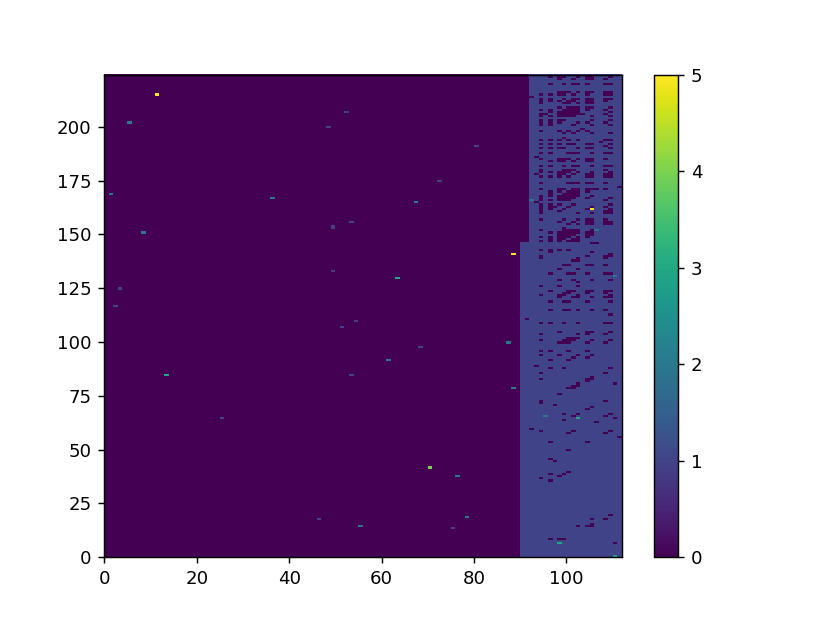

In [70]:
chip['data_rx'].set_en(True)
for _ in range(10):
    chip["fifo"].reset()
    time.sleep(0.002)

dt = 0.2
chip.reset_ibias()
chip.reset_ibias()
chip['fifo'].reset()
time.sleep(dt)
dat = chip.interpret_data(chip['fifo'].get_data())
#pix_tmp, cnt = np.unique(dat[['col', 'row']], return_counts=True)

print "%d hits found in %g s" % (len(dat), dt)
#for p, c in zip(pix_tmp, cnt):
#    print "%s %s" % (p, c)
plt.figure()
plt.hist2d(dat["col"], dat["row"], bins=[112,224], range=[[0,112],[0,224]],
          )#norm=matplotlib.colors.LogNorm(vmin=1))
plt.colorbar()
plt.show()

In [69]:
# Automask, ma commentiamo alcuni pezzi
th = 10
step = 50
exp = 0.2
max_pixels_before_giving_up = 100000

chip['data_rx'].set_en(True)
for _ in range(5):
    chip['fifo'].reset()
    time.sleep(0.002)
chip.reset_ibias()

print("auto_mask th=%d step=%d exp=%f fl=%s" % (th, step, exp, chip.SET['fl']))
chip['CONF_SR'][chip.SET['fl']].setall(False)
chip['CONF_SR']['EN_OUT'][chip.fl_n] = False
chip['CONF_SR']['MASKD'].setall(False)
chip['CONF_SR']['MASKH'].setall(False)
chip['CONF_SR']['MASKV'].setall(False)
chip.write_conf()

chip['CONF_SR'][chip.SET['fl']].setall(True)
chip.write_conf()

for _ in range(10):
    chip["fifo"].reset()
    time.sleep(0.1)

pix = np.empty(224*112, dtype=[('flavor', 'u1'), ('col', 'u1'), ('row', '<u2')])
pix_i = 0

# Iterate over MASKH to find noisy pixels
for i in np.append(range(step, len(chip['CONF_SR']['MASKH']), step), 223):
    chip['CONF_SR']['MASKD'].setall(False)
    chip['CONF_SR']['MASKV'].setall(False)
    chip['CONF_SR']['MASKH'].setall(False)
    chip['CONF_SR']['MASKH'][i:0] = (int(i) + 1) * bitarray('1')
    for p_i in range(pix_i):
        chip.mask(pix[p_i]["flavor"], pix[p_i]['col'], pix[p_i]['row'])
    chip['CONF_SR'].write()

    # Set ibias to zero and back again to eliminate oscillations from mask switching
    chip.reset_ibias()
    chip.reset_ibias()
    chip['fifo'].reset()
    time.sleep(exp)
    dat = chip.interpret_data(chip['fifo'].get_data())

    pix_tmp, cnt = np.unique(dat[['col', 'row']], return_counts=True)
    print("Enable MASKH " + str(i) + " Noise data " + str(len(dat)))
    if len(pix_tmp) > max_pixels_before_giving_up:
        print("Too many noisy pixels, try smaller step.")
        raise Exception()
    for p_i, p in enumerate(pix_tmp):
        if cnt[p_i] < th:
            pass
        else:
            if not (0 <=  p['col'] <= 111 and 0 <=  p['row'] <= 223):
                print "Warning: invalid pixel with col,row = %d,%d" % (p['col'], p['row'])
                continue
            pix[pix_i]["col"] = p['col']
            pix[pix_i]["row"] = p['row']
            pix[pix_i]["flavor"] = chip.fl_n
            pix_i = pix_i + 1
    print("Number of noisy pixels: %d" % pix_i)

# Iterate over MASKV to find noisy pixels
for i in np.append(range(step, 111, step), 111):
    chip['CONF_SR']['MASKD'].setall(False)
    chip['CONF_SR']['MASKV'].setall(False)
    chip['CONF_SR']['MASKH'].setall(True)
    chip['CONF_SR']['MASKV'][i + (chip.fl_n * 112):(chip.fl_n * 112)] = (int(i) + 1) * bitarray('1')
    for p_i in range(pix_i):
        chip.mask(pix[p_i]["flavor"], pix[p_i]['col'], pix[p_i]['row'])
    chip['CONF_SR'].write()

    # Set ibias to zero and back again to eliminate oscillations from mask switching
    chip.reset_ibias()
    chip.reset_ibias()

    chip['fifo'].reset()
    time.sleep(exp)
    dat = chip.interpret_data(chip['fifo'].get_data())

    pix_tmp, cnt = np.unique(dat[['col', 'row']], return_counts=True)
    print("Enable MASKV " + str(i) + " Noise data " + str(len(dat)))
    if len(pix_tmp) > max_pixels_before_giving_up:
        print("Too many noisy pixels, try smaller step.")
        raise Exception()
    for p_i, p in enumerate(pix_tmp):
        if cnt[p_i] < th:
            pass
        else:
            if not (0 <=  p['col'] <= 111 and 0 <=  p['row'] <= 223):
                print "Warning: invalid pixel with col,row = %d,%d" % (p['col'], p['row'])
                continue
            pix[pix_i]["col"] = p['col']
            pix[pix_i]["row"] = p['row']
            pix[pix_i]["flavor"] = chip.fl_n
            pix_i = pix_i + 1
    print("Number of noisy pixels: %d" % pix_i)

# Iterate over MASKD to find noisy pixels
for i in np.append(range(step, len(chip['CONF_SR']['MASKD']) - 1, step), len(chip['CONF_SR']['MASKD']) - 1):
    chip['CONF_SR']['MASKD'].setall(False)
    chip['CONF_SR']['MASKV'][(chip.fl_n + 1) * 112-1:(chip.fl_n * 112)] = (int(112)) * bitarray('1')
    chip['CONF_SR']['MASKH'].setall(True)
    chip['CONF_SR']['MASKD'][i:0] = (int(i)+1)*bitarray('1')
    for p_i in range(pix_i):
        chip.mask(pix[p_i]["flavor"], pix[p_i]['col'], pix[p_i]['row'])
    chip['CONF_SR'].write()

    # Set ibias to zero and back again to eliminate oscillations from mask switching
    chip.reset_ibias()
    chip.reset_ibias()

    chip['fifo'].reset()
    time.sleep(exp)
    dat = chip.interpret_data(chip['fifo'].get_data())

    pix_tmp, cnt = np.unique(dat[['col', 'row']], return_counts=True)
    print("Enable MASKD " + str(i) + " Noise data " + str(len(dat)))

    if len(pix_tmp) > max_pixels_before_giving_up:
        print("Too many noisy pixels, try smaller step.")
        raise Exception()
    for p_i, p in enumerate(pix_tmp):
        if cnt[p_i] < th:
            pass
        else:
            if not (0 <=  p['col'] <= 111 and 0 <=  p['row'] <= 223):
                print "Warning: invalid pixel with col,row = %d,%d" % (p['col'], p['row'])
                continue
            pix[pix_i]["col"] = p['col']
            pix[pix_i]["row"] = p['row']
            pix[pix_i]["flavor"] = chip.fl_n
            pix_i = pix_i + 1
    print("Number of noisy pixels: %d" % pix_i)

# Mask all previously found pixels and check again
for p_i in range(pix_i):
    chip.mask(pix[p_i]["flavor"], pix[p_i]['col'], pix[p_i]['row'])
chip['CONF_SR'].write()

# Set ibias to zero and back again to eliminate oscillations from mask switching
chip.reset_ibias()
chip.reset_ibias()

chip['fifo'].reset()
time.sleep(exp)
dat = chip.interpret_data(chip['fifo'].get_data())
pix_tmp, cnt = np.unique(dat[['col', 'row']], return_counts=True)
print("Checking noisy pixels after masking...")
print("Data size: " + str(len(dat)))
if len(pix_tmp) > max_pixels_before_giving_up:
    print("Too many noisy pixels, try smaller step.")
    raise Exception()
for p_i, p in enumerate(pix_tmp):
    if cnt[p_i] < th:
        pass
    else:
        if not (0 <=  p['col'] <= 111 and 0 <=  p['row'] <= 223):
            print "Warning: invalid pixel with col,row = %d,%d" % (p['col'], p['row'])
            continue
        pix[pix_i]["col"] = p['col']
        pix[pix_i]["row"] = p['row']
        pix[pix_i]["flavor"] = chip.fl_n
        pix_i = pix_i + 1
print("Number of noisy pixels: %d" % pix_i)

# Mask additionally found noisy pixels
for p_i in range(pix_i):
    chip.mask(pix[p_i]["flavor"], pix[p_i]['col'], pix[p_i]['row'])
chip['CONF_SR'].write()
chip['fifo'].reset()
time.sleep(0.3)
pix = np.unique(pix[:pix_i])
print("Noisy pixels: " + str(pix))
print("Total number of noisy pixels: " + str(len(pix)))

chip.reset_ibias()

# Get mask from register settings
mask = chip.get_disabled_pixel(maskV=chip['CONF_SR']['MASKV'], maskH=chip['CONF_SR']['MASKH'], maskD=chip['CONF_SR']['MASKD'])
total_enabled = np.shape(np.argwhere(mask[(chip.fl_n * 112):(chip.fl_n + 1) * 112, :] != 0))[0]
total_disabled = np.shape(np.argwhere(mask[(chip.fl_n * 112):(chip.fl_n + 1) * 112, :] == 0))[0]
print("Number of enabled pixels: {}".format(str(total_enabled)))
print("Number of disabled pixels (noisy plus unintentionally masked): {}".format(str(total_disabled))) 


auto_mask th=10 step=50 exp=0.200000 fl=EN_HV
Enable MASKH 50 Noise data 39420
Number of noisy pixels: 15
Enable MASKH 100 Noise data 135780
Number of noisy pixels: 47
Enable MASKH 150 Noise data 155003
Number of noisy pixels: 76
Enable MASKH 200 Noise data 213862
Number of noisy pixels: 122
Enable MASKH 223 Noise data 182681
Number of noisy pixels: 176
Enable MASKV 50 Noise data 81
Number of noisy pixels: 176
Enable MASKV 100 Noise data 93
Number of noisy pixels: 178
Enable MASKV 111 Noise data 98
Number of noisy pixels: 179
Enable MASKD 50 Noise data 72
Number of noisy pixels: 179
Enable MASKD 100 Noise data 76
Number of noisy pixels: 179
Enable MASKD 150 Noise data 87
Number of noisy pixels: 179
Enable MASKD 200 Noise data 197
Number of noisy pixels: 179
Enable MASKD 250 Noise data 94
Number of noisy pixels: 180
Enable MASKD 300 Noise data 169
Number of noisy pixels: 181
Enable MASKD 350 Noise data 941
Number of noisy pixels: 181
Enable MASKD 400 Noise data 3915
Number of noisy pixe

In [ ]:
#chip['data_rx'].set_en(True)
#for _ in range(5):
#    chip['fifo'].reset()
#    time.sleep(0.002)
#chip.reset_ibias()
#chip.auto_mask(th=20, step=10, exp=0.002)

In [71]:
### stop oscillation
chip.reset_ibias()

In [72]:
### check noise occupancy
exp_time=1
chip['data_rx'].set_en(True)
chip.reset_ibias()
for _ in range(10):
    chip['fifo'].reset()
    time.sleep(0.002) 
time.sleep(exp_time)
x = chip['fifo'].get_data()
ix = chip.interpret_data(x)
print(len(ix))
uni,cnt=np.unique(ix[["col","row"]],return_counts=True)
arg=np.argsort(cnt)
for a_i,a in enumerate(arg[::-1]):
    print uni[a],cnt[a]
    chip.mask(3,uni[a][0],uni[a][1])
chip.write_conf()

456
(63, 129) 31
(102, 64) 26
(98, 6) 19
(15, 152) 16
(1, 168) 15
(11, 214) 15
(68, 97) 14
(2, 125) 13
(105, 161) 13
(72, 209) 13
(88, 140) 13
(110, 0) 12
(36, 166) 11
(74, 194) 11
(56, 185) 11
(61, 91) 8
(78, 18) 8
(76, 37) 7
(72, 174) 7
(70, 41) 7
(87, 99) 7
(96, 152) 7
(5, 201) 6
(13, 84) 6
(9, 116) 6
(52, 206) 6
(88, 78) 6
(88, 44) 6
(67, 164) 5
(46, 17) 5
(53, 155) 5
(77, 2) 5
(87, 40) 4
(106, 29) 4
(20, 184) 4
(90, 152) 4
(43, 14) 3
(11, 29) 3
(49, 153) 3
(51, 106) 3
(83, 127) 3
(109, 22) 3
(54, 129) 3
(95, 65) 3
(55, 14) 3
(80, 190) 3
(99, 80) 3
(3, 124) 3
(3, 91) 3
(36, 173) 3
(44, 210) 2
(92, 165) 2
(10, 109) 2
(19, 156) 2
(8, 150) 2
(24, 212) 2
(25, 64) 2
(25, 141) 2
(106, 151) 2
(0, 28) 2
(54, 109) 2
(49, 132) 2
(63, 41) 2
(49, 152) 2
(54, 214) 2
(56, 209) 1
(9, 149) 1
(58, 183) 1
(80, 171) 1
(6, 163) 1
(44, 208) 1
(62, 65) 1
(2, 139) 1
(76, 110) 1
(2, 116) 1
(1, 183) 1
(72, 158) 1
(100, 139) 1
(12, 127) 1
(44, 145) 1
(53, 84) 1
(53, 58) 1
(18, 34) 1
(51, 117) 1
(48, 199) 1


In [73]:
## configure injection pulse and inject pulses to one pixel
col=18
row=25

delay=800
width=250
repeat=100
chip['inj'].set_delay(delay)
chip['inj'].set_width(width)
chip['inj'].set_repeat(repeat)
chip['inj'].set_phase(0)
chip['inj'].set_en(0)

chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)
chip.enable_injection(3,col,row)
chip.write_conf()
chip.reset_ibias()

chip['data_rx'].set_en(True)
for _ in range(5):
    chip['fifo'].reset()
    time.sleep(0.002)
chip["inj"].start()
while not chip['inj'].is_ready:
    time.sleep(0.001)
time.sleep(0.2)
print chip['fifo'].get_fifo_size()
x = chip['fifo'].get_data()
ix = chip.interpret_data(x)
uni,cnt=np.unique(ix[["col","row"]],return_counts=True)
arg=np.argsort(cnt)
for a_i,a in enumerate(arg[::-1]):
    print uni[a],cnt[a]
chip['data_rx'].set_en(False)

2022-01-24 12:30:03,095 [WARNI] (MainThread) Deprecated: Use get_FIFO_SIZE()


1236
(18, 25) 100
(78, 121) 1
(49, 42) 1
(33, 76) 1


## INJECTION SCANS -  S-CURVE

In [74]:
injlist=np.arange(80,0,-1)

inj_low=chip.get_vl_dacunits()
chip['data_rx'].set_en(True)
for _ in range(5):
    chip['fifo'].reset()
    time.sleep(0.002)

cnt=np.empty(len(injlist))
tot=np.empty(len(injlist))
for inj_i,inj in enumerate(injlist):
    chip.set_vh_dacunits(inj+inj_low,0)
    chip.write_conf()
    for _ in range(5):
        chip['fifo'].reset()
        time.sleep(0.002)
    chip.set_monoread()
    chip["inj"].start()
    while not chip['inj'].is_ready:
        time.sleep(0.001)
    time.sleep(0.02)
    x = chip['fifo'].get_data()
    ix = chip.interpret_data(x)
    ix_inj=ix[np.bitwise_and(ix["col"]==col,ix["row"]==row)]
    print inj,len(ix),len(ix_inj),np.average((ix_inj["te"]-ix_inj["le"]) & 0x3F)
    cnt[inj_i]=len(ix_inj)
    tot[inj_i]=np.average((ix_inj["te"]-ix_inj["le"]) & 0x3F)

80 101 100 6.16
79 101 100 6.03
78 101 100 6.12
77 101 100 6.15
76 101 100 6.14
75 101 100 6.14
74 101 100 6.14
73 100 100 6.06
72 102 100 6.18
71 100 100 6.09
70 100 100 6.05
69 102 100 6.03
68 100 100 6.02
67 101 100 6.03
66 101 100 6.15
65 100 100 6.08
64 101 100 6.04
63 103 100 5.95
62 102 100 5.94
61 100 100 5.81
60 100 100 5.82
59 101 100 5.71
58 101 100 5.69
57 100 100 5.51
56 100 100 5.49
55 100 100 5.44
54 101 100 5.4
53 101 100 5.36
52 100 100 5.25
51 101 100 5.1
50 101 100 5.03
49 102 100 4.92
48 100 100 4.82
47 101 100 4.82
46 101 100 4.62
45 100 100 4.53
44 101 100 4.49
43 102 100 4.47
42 100 100 4.36
41 101 100 4.24
40 100 100 4.06
39 102 100 3.97
38 101 100 3.92
37 100 100 3.75
36 101 100 3.57
35 101 100 3.35
34 100 100 3.05
33 100 100 2.9
32 101 100 2.81
31 100 100 2.62
30 101 100 2.39
29 101 100 2.0
28 102 100 1.75
27 98 98 1.5
26 84 83 1.4698795180722892
25 77 76 1.4210526315789473
24 73 72 1.1944444444444444
23 59 58 0.9310344827586207
22 34 34 1.088235294117647
21 2

approx. th= 23 DAC 759 e


<IPython.core.display.Javascript object>


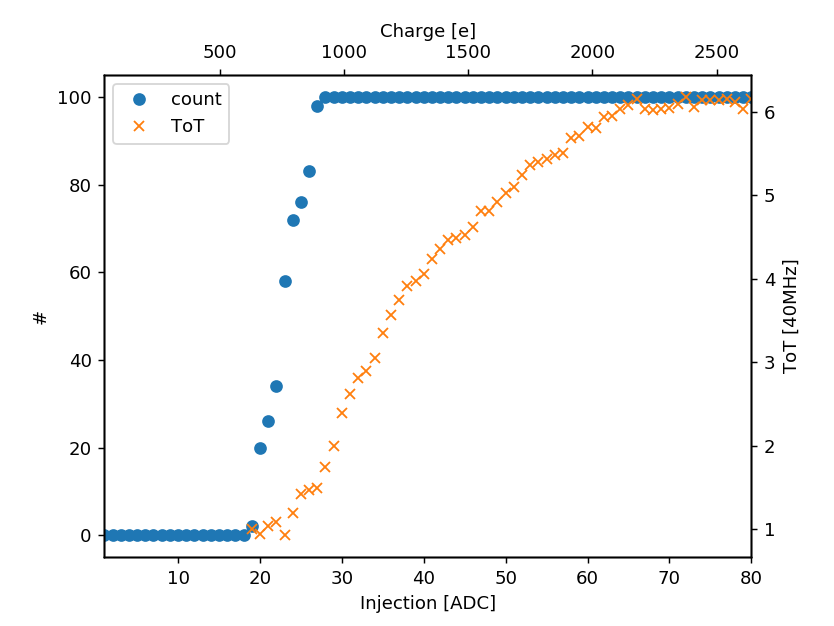

In [75]:
### plot

print "approx. th=",injlist[np.argmin(np.abs(cnt-repeat/2))],"DAC",injlist[np.argmin(np.abs(cnt-repeat/2))]*CALCAP,"e"
fig,ax=plt.subplots(1,1)
ax.plot(injlist,cnt,"C0o",label="count")
ax2=ax.twiny()
ax3=ax.twinx()
ax3.plot(injlist,tot,"C1x",label="ToT")
ax.plot([],[],"C1x",label="ToT")

ax.set_xlabel("Injection [ADC]")
ax.set_ylabel("#")
ax3.set_ylabel("ToT [40MHz]")
ax2.set_xlabel("Charge [e]")
ax.set_xbound(np.min(injlist),np.max(injlist))
ax2.set_xbound(np.min(injlist)*CALCAP,np.max(injlist)*CALCAP)
ax.legend()